<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle Data</a></li>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target</a></li>
<li><a href='#compareaggregate'>Comparison of Aggregate Columns to Target</a></li>
<li><a href='#comparemisc'>Comparison of Miscellaneous Columns to Target</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [3]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Stats
from scipy import stats

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# .py file
import wrangle as w

In [4]:
# Set default matplotlib plot style to 'bmh'
mpl.style.use('bmh')

<div style='background-color: orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle Data
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [5]:
# Wrangle and split the mass_shooters data for proper
# exploratory purposes
train, validate, test = w.wrangle_mass_shooters()

In [6]:
# Verify split data
train.shape, validate.shape, test.shape

((131, 254), (38, 254), (19, 254))

<div style='background-color: orange'>
<a id='comparebinary'></a>
    <b><u><i><h1 style='text-align: center'>
        Comparison of Binary Columns to Target
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#binaryidentify'>Identify Binary Columns</a></li>
<li><a href='#binarystats'>Stats Test Binary Columns</a></li>
<li><a href='#binaryratio'>Identify Binary Columns With A Strong Ratio to Target</a></li>
<li><a href='#binaryvisual'>Visualize Filtered Binary Columns</a></li>
<li><a href='#binarysummary'>Summary of Binary Columns</a></li>

<a id='binaryidentify'></a>
<h3><b><i>
    Identify Binary Columms
</i></b></h3>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target Top</a></li>

- 197 out of 254 columns

In [16]:
# Identify all of the binary columns
binary_cols = []
for col in train.columns:
    if train[col].nunique() == 2:
        binary_cols.append(col)
len(binary_cols)

197

---

<a id='binarystats'></a>
<h3><b><i>
    Stats Test Binary Columms
</i></b></h3>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target Top</a></li>

- 41 out of 197 binary columns passed stats testing

In [38]:
# Of the identified binary columns...
# Identify which ones are statistically significant
# via chi2_contingency
binary_cols_passed_stats = []
alpha = 0.05
for col in binary_cols:
    contingency_table = pd.crosstab(train.shooter_volatility, train[col])
    stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    if p_value < alpha:
        binary_cols_passed_stats.append(col)
len(binary_cols_passed_stats)

41

---

<a id='binaryratio'></a>
<h3><b><i>
    Identify Binary Columms With A Strong Ratio to Target
</i></b></h3>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target Top</a></li>

- 32 out of 41 passing binary columns have a strong ratio
    - Column >= 0.7
        - Zero High = 1
        - Zero Low = 14
        - One High = 8
        - One Low = 9

In [53]:
# Of the binary columns that passed the stats testing...
# Identify which ones have a strong ratio when compared
# to the target variable 'shooter_volatility'
strong_zeros_high_ratio_col = []
strong_zeros_low_ratio_col = []
strong_ones_high_ratio_col = []
strong_ones_low_ratio_col = []
for col in binary_cols_passed_stats:
    total_zeros = (train[col] == 0).sum()
    total_ones = (train[col] == 1).sum()
    total_zeros_high = ((train[col] == 0) & (train.shooter_volatility == 'High Volatility')).sum()
    total_zeros_low = ((train[col] == 0) & (train.shooter_volatility == 'Low Volatility')).sum()
    total_ones_high = ((train[col] == 1) & (train.shooter_volatility == 'High Volatility')).sum()
    total_ones_low = ((train[col] == 1) & (train.shooter_volatility == 'Low Volatility')).sum()
    ratio_zeros_high = total_zeros_high / total_zeros
    ratio_zeros_low = total_zeros_low / total_zeros
    ratio_ones_high = total_ones_high / total_ones
    ratio_ones_low = total_ones_low / total_ones
    if ratio_zeros_high >= 0.7:
        strong_zeros_high_ratio_col.append(col)
    elif ratio_zeros_low >= 0.7:
        strong_zeros_low_ratio_col.append(col)
    elif ratio_ones_high >= 0.7:
        strong_ones_high_ratio_col.append(col)
    elif ratio_ones_low >= 0.7:
        strong_ones_low_ratio_col.append(col)
print(f'\033[35mColumns With Strong Zero High Volatility:\033[0m {len(strong_zeros_high_ratio_col)}')
print(f'\033[35mColumns With Strong Zero Low Volatility:\033[0m {len(strong_zeros_low_ratio_col)}')
print(f'\033[35mColumns With Strong Ones High Volatility:\033[0m {len(strong_ones_high_ratio_col)}')
print(f'\033[35mColumns With Strong One Low Volatility:\033[0m {len(strong_ones_low_ratio_col)}')

Columns With Strong Zero High Volatility: 1
Columns With Strong Zero Low Volatility: 14
Columns With Strong Ones High Volatility: 8
Columns With Strong One Low Volatility: 9


---

<a id='binaryvisual'></a>
<h3><b><i>
    Visualize Filtered Binary Columns
</i></b></h3>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target Top</a></li>

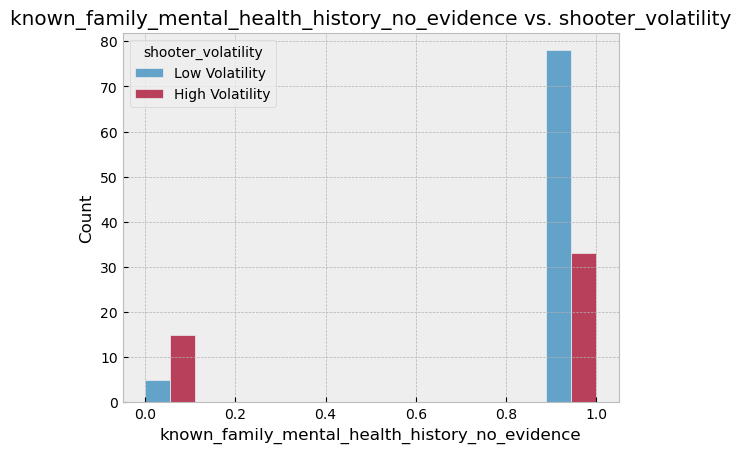

In [54]:
# Visualize the Zero High Columns
for col in strong_zeros_high_ratio_col:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.title(f'{col} vs. shooter_volatility')
    plt.show()

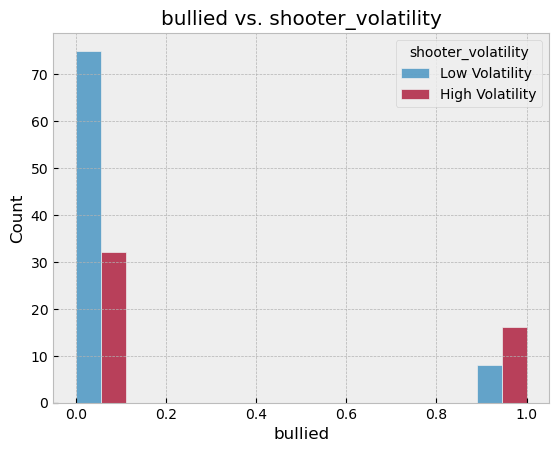

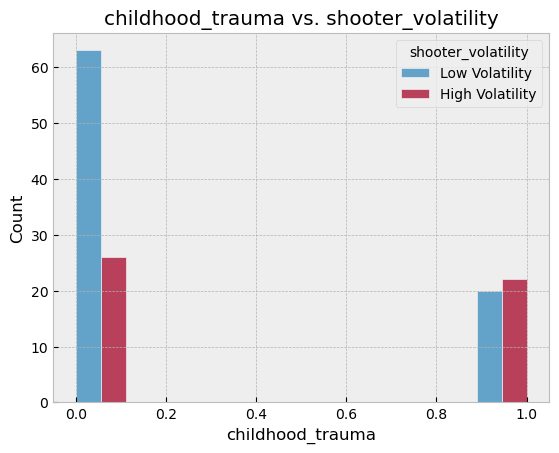

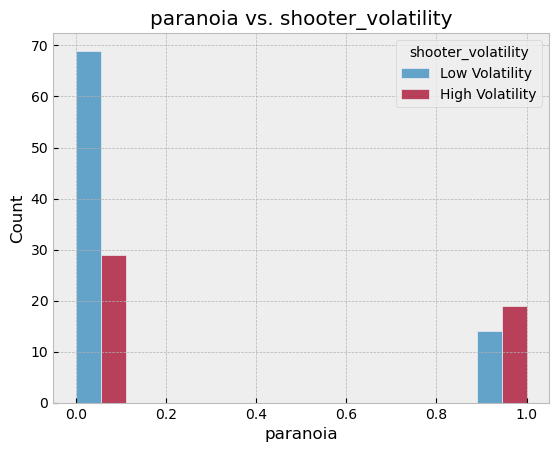

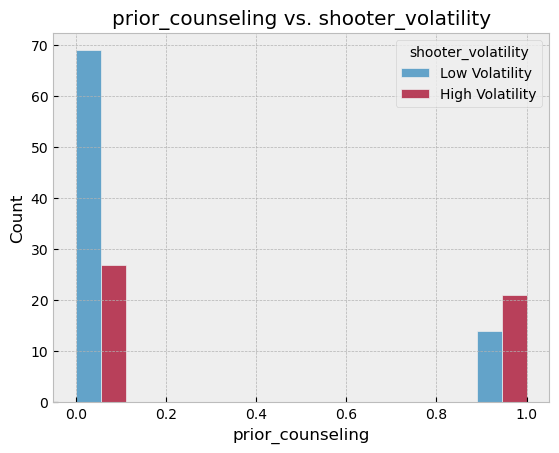

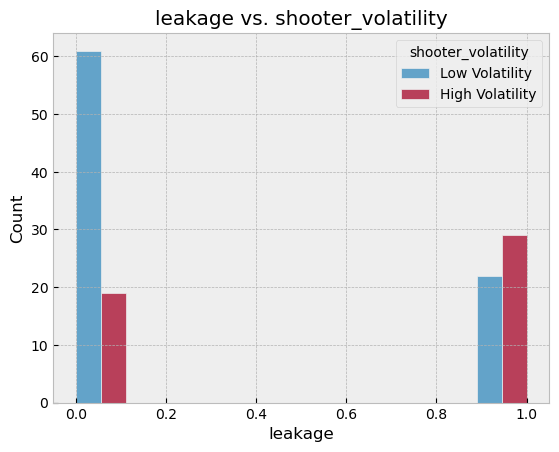

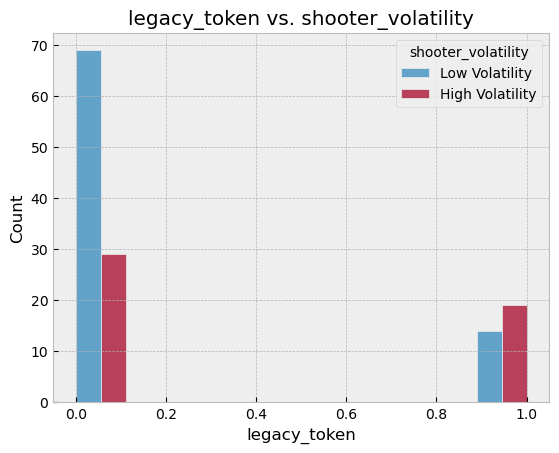

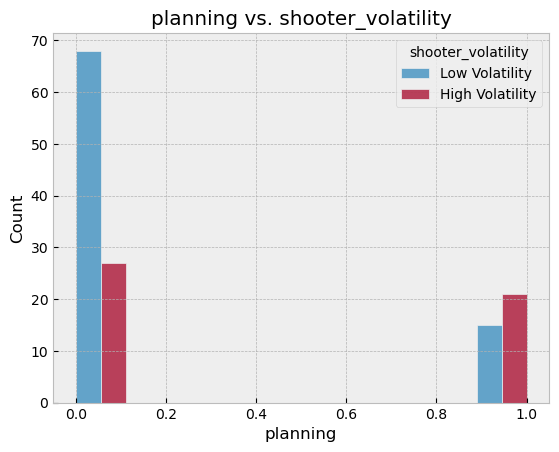

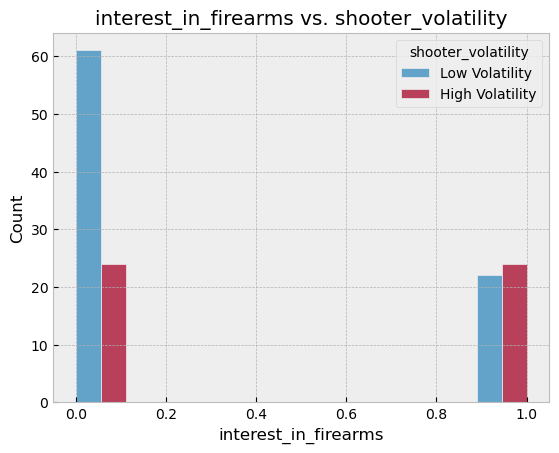

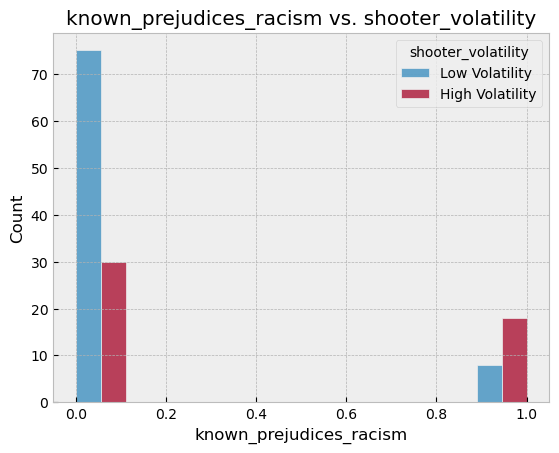

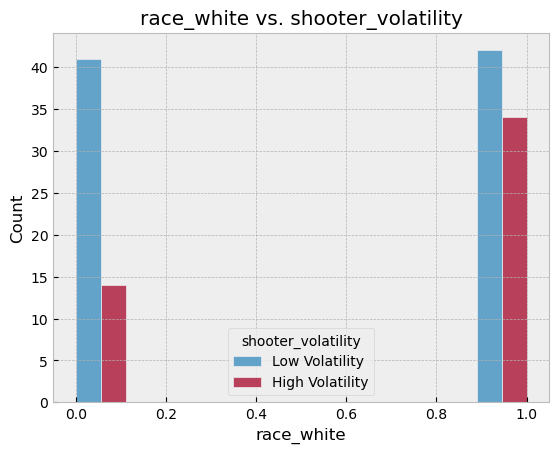

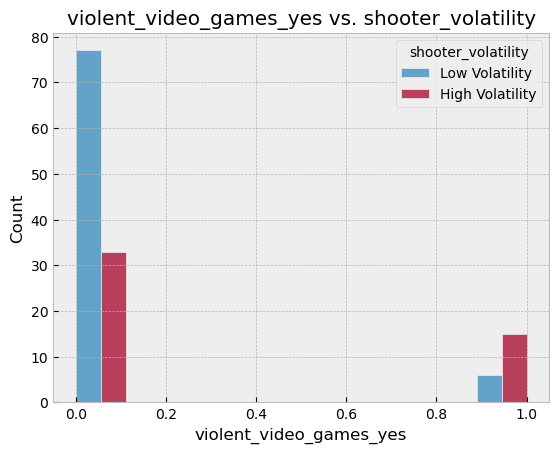

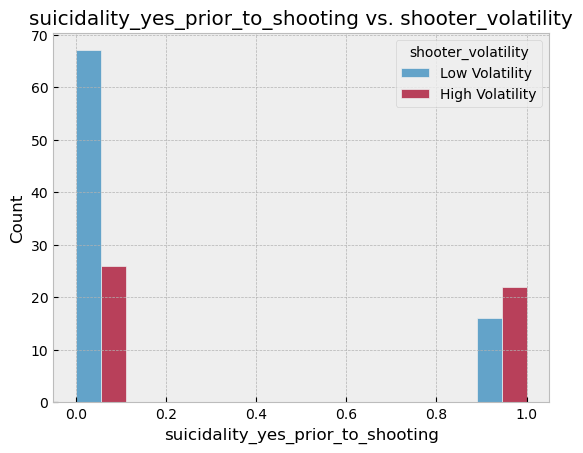

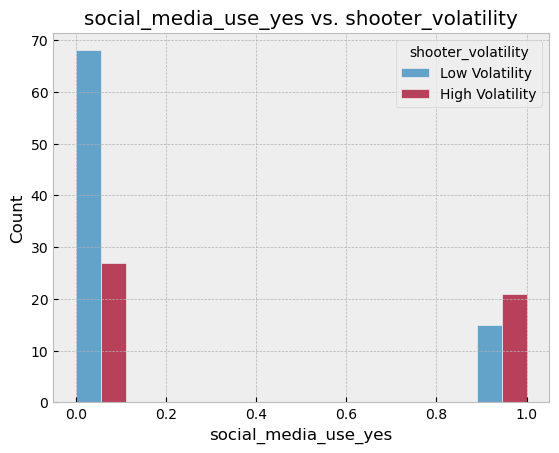

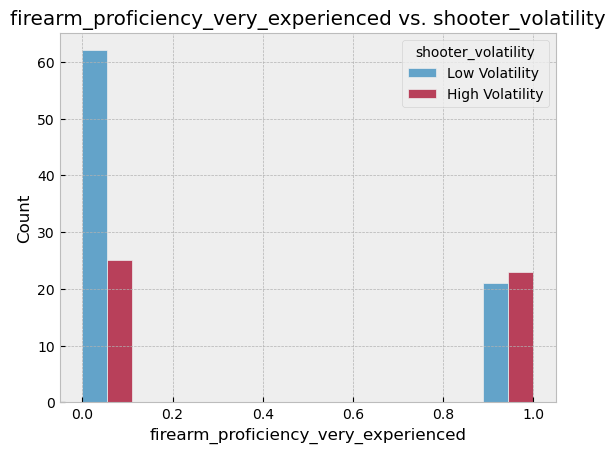

In [55]:
# Visualize the Zero Low Columns
for col in strong_zeros_low_ratio_col:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.title(f'{col} vs. shooter_volatility')
    plt.show()

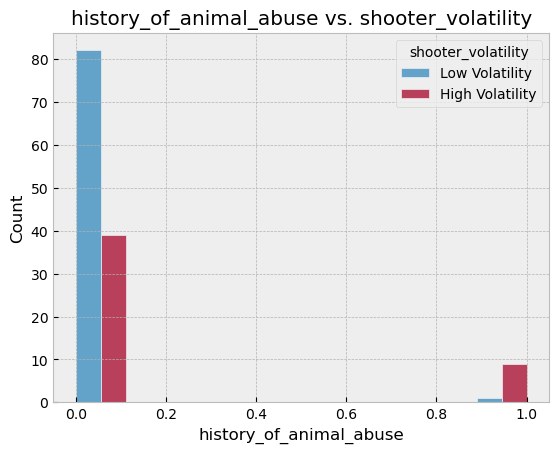

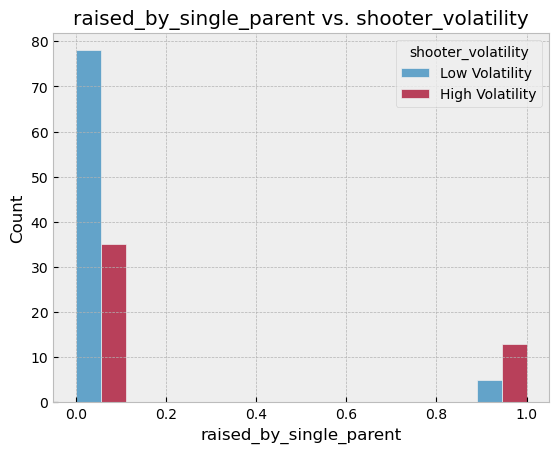

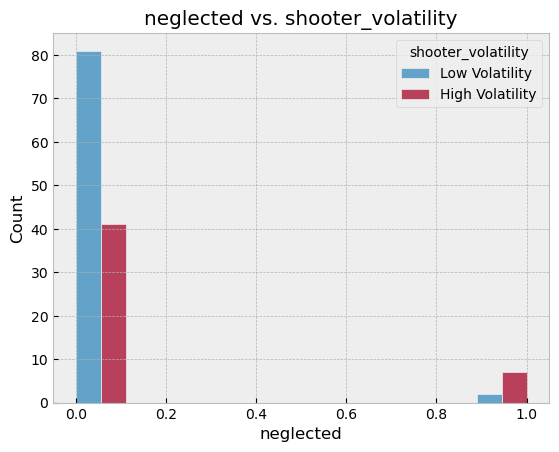

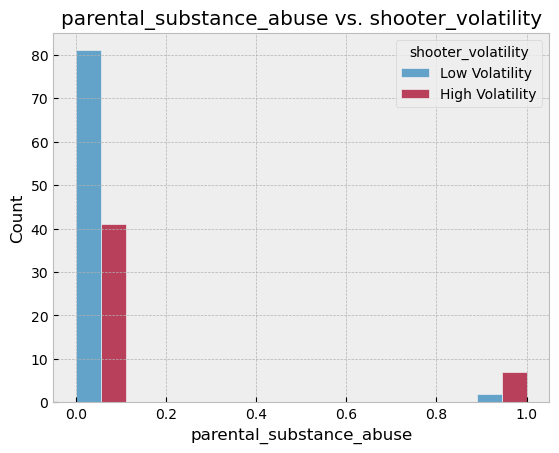

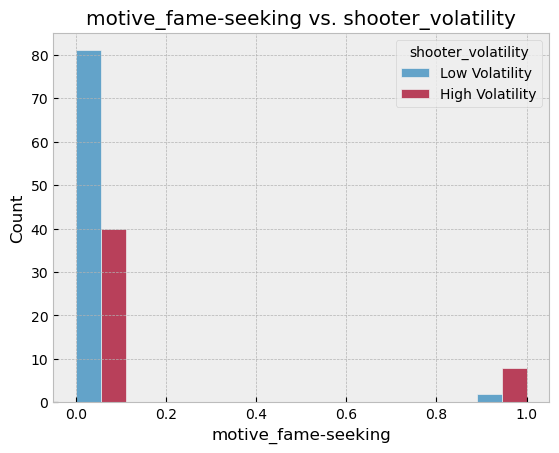

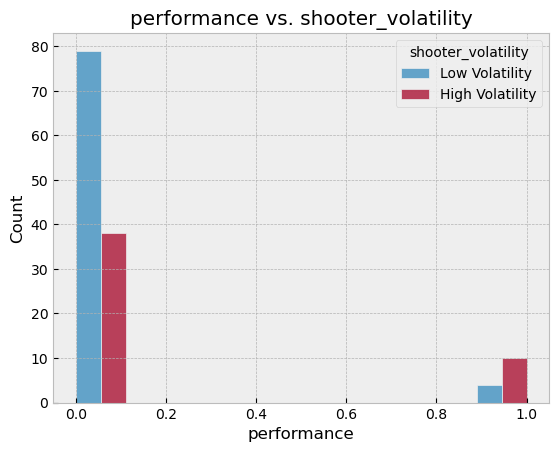

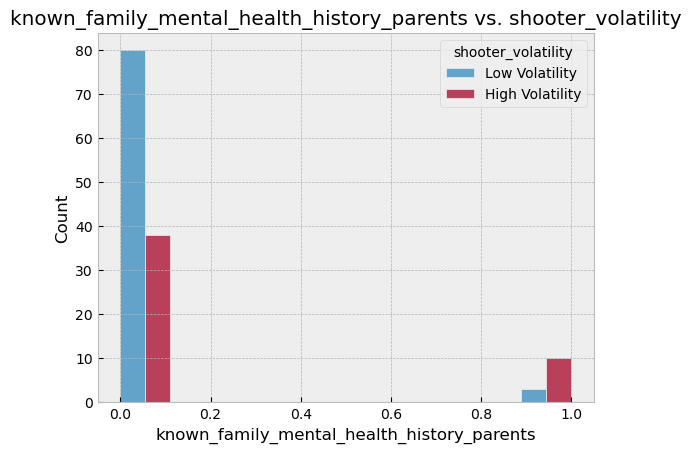

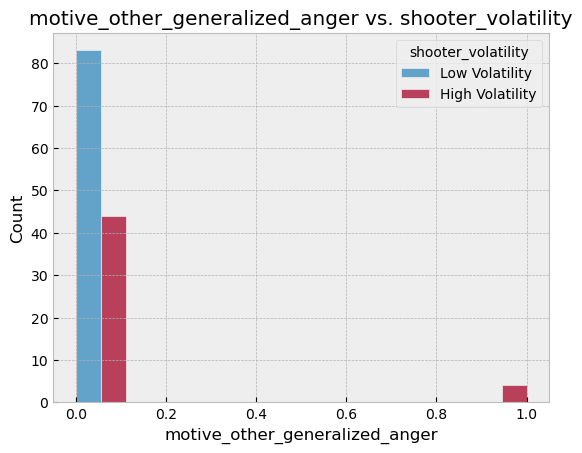

In [56]:
# Visualize the One High Columns
for col in strong_ones_high_ratio_col:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.title(f'{col} vs. shooter_volatility')
    plt.show()

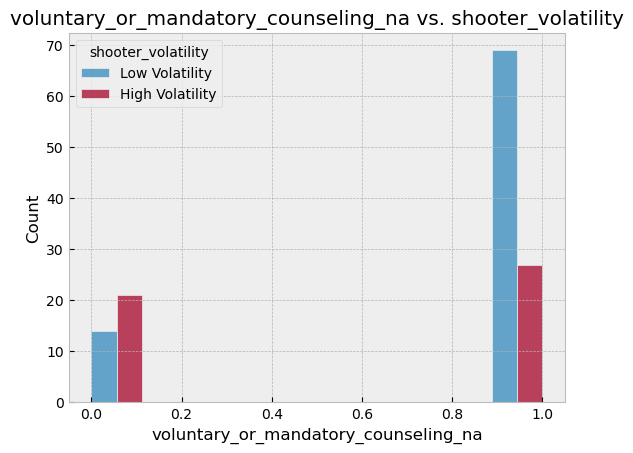

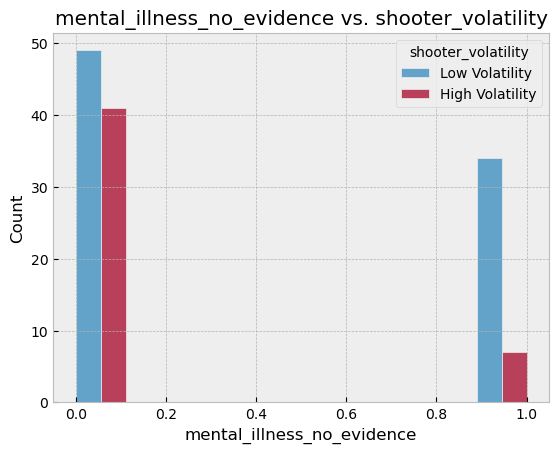

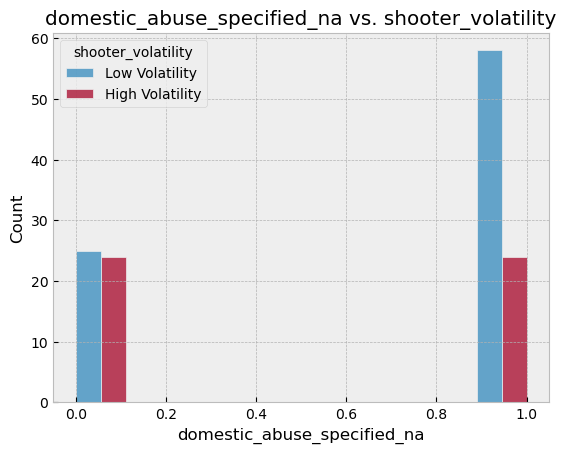

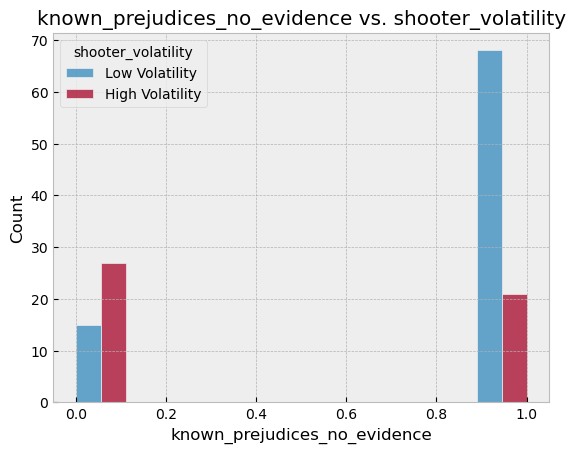

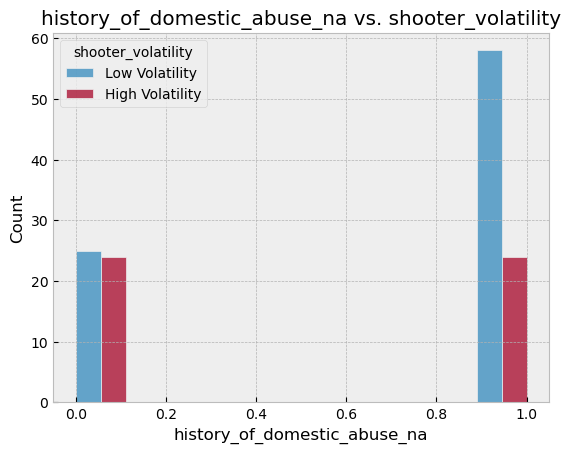

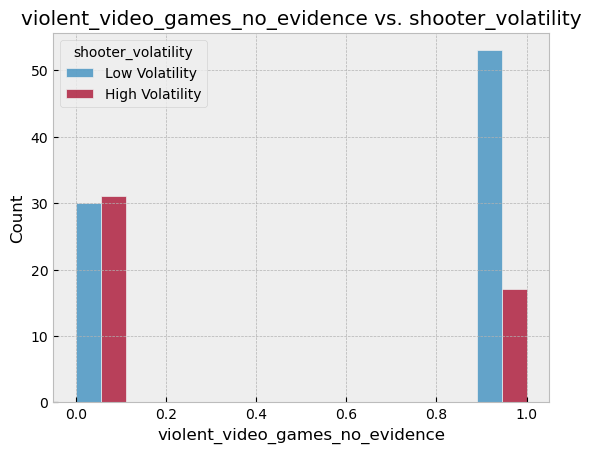

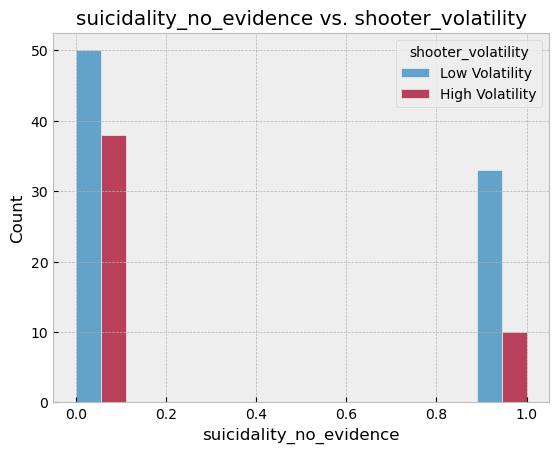

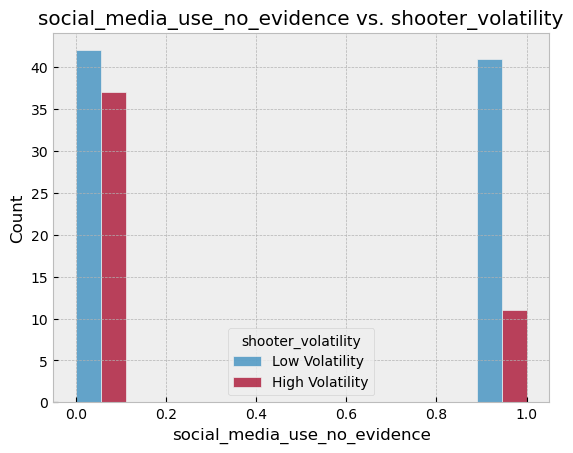

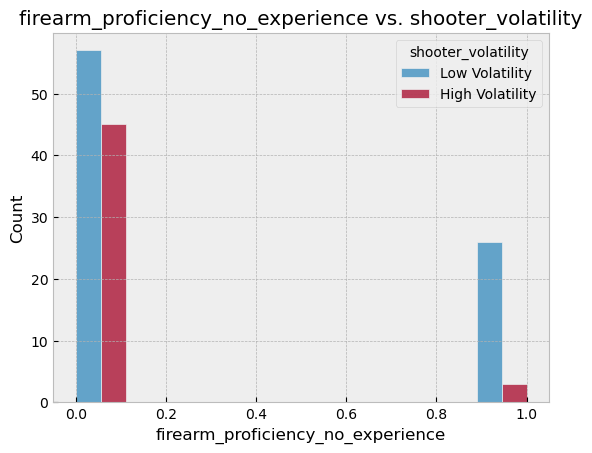

In [57]:
# Visualize the One Low Columns
for col in strong_ones_low_ratio_col:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.title(f'{col} vs. shooter_volatility')
    plt.show()

---

<a id='binarysummary'></a>
<h3><b><i>
    Summary of Binary Columns
</i></b></h3>
<li><a href='#comparebinary'>Comparison of Binary Columns to Target Top</a></li>

- Binary Columns:
    - 197 / 254
- Passed Stats Testing:
    - 41 / 197
- Has >= 0.7 Ratio to Target:
    - 32 / 41
        - Zero High = 1
        - Zero Low = 14
        - One High = 8
        - One Low = 9

<div style='background-color: orange'>
<a id='compareaggregate'></a>
    <b><u><i><h1 style='text-align: center'>
        Comparison of Aggregate Columns to Target
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#aggidentify'>Identify Aggregate Columns</a></li>
<li><a href='#aggstats'>Stats Test Aggregate Columns</a></li>
<li><a href='#aggvisual'>Visualize Filtered Aggregate Columns</a></li>
<li><a href='#aggsummary'>Summary of Aggregate Columns</a></li>

<a id='aggidentify'></a>
<h3><b><i>
    Identify Aggregate Columns
</i></b></h3>
<li><a href='#compareaggregate'>Comparison of Aggregate Columns to Target Top</a></li>

- 13 out of 254 columns

In [12]:
# Identify all of the aggregate columns
agg_cols = [col for col in train.columns if col.startswith('agg')]
len(agg_cols)

13

---

<a id='aggstats'></a>
<h3><b><i>
    Stats Test Aggregate Columns
</i></b></h3>
<li><a href='#compareaggregate'>Comparison of Aggregate Columns to Target Top</a></li>

- 6 out of 13 aggregate columns passed stats testing

In [71]:
# Of the identified aggregate columns...
# Identify which ones are statistically significant
# via ttest_ind_from_stats
agg_cols_passed_stats = []
alpha = 0.05
for col in agg_cols:
    target_binary = np.where(train.shooter_volatility == 'High Volatility', 1, 0)
    target_mean = sum(target_binary) / train.shape[0]
    non_target_mean = train[col].mean()
    stat, p = stats.ttest_ind_from_stats(mean1=target_mean, std1=1, nobs1=train.shape[0],
                               mean2=non_target_mean, std2=1, nobs2=train.shape[0],
                               equal_var=False)
    if p < alpha:
        agg_cols_passed_stats.append(col)
len(agg_cols_passed_stats)

6

---

<a id='aggvisual'></a>
<h3><b><i>
    Visualize Filtered Aggregate Columns
</i></b></h3>
<li><a href='#compareaggregate'>Comparison of Aggregate Columns to Target Top</a></li>

- Appears to be a trend where as the aggregate score increases, so does the ratio of high volatile shooters...

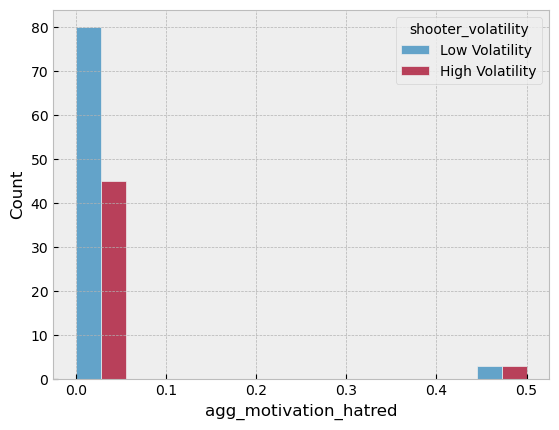

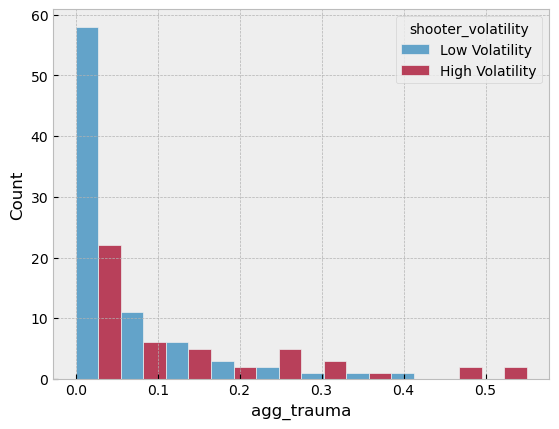

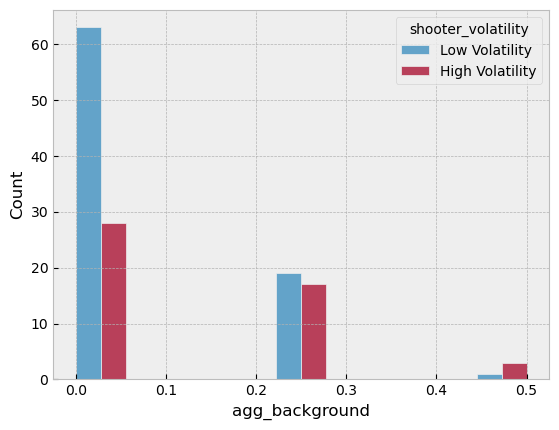

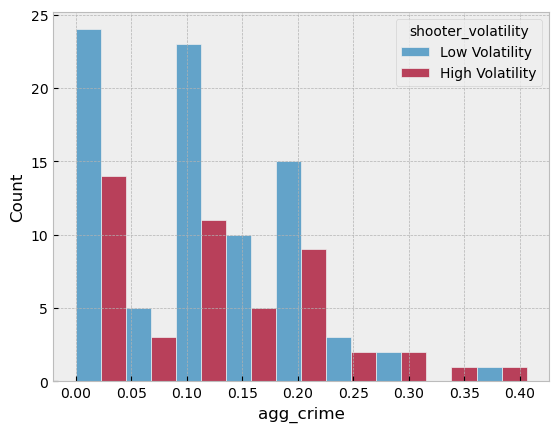

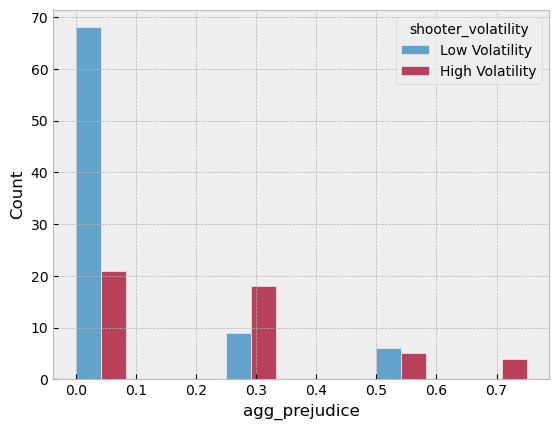

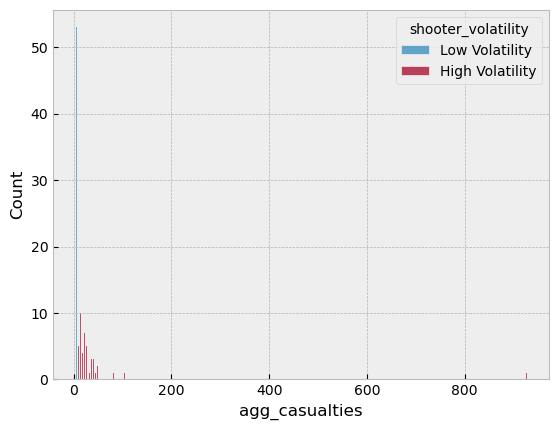

In [82]:
# Determine if there's any significance in the visuals...
for col in agg_cols_passed_stats:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.show()

---

<a id='aggsummary'></a>
<h3><b><i>
    Summary of Aggregate Columns
</i></b></h3>
<li><a href='#compareaggregate'>Comparison of Aggregate Columns to Target Top</a></li>

- Aggregate Columns:
    - 13 / 254
- Passed Stats Testing:
    - 6 / 13
- Significance:
    - As agg_score increases, ratio of high volatile shooter also increases

<div style='background-color: orange'>
<a id='comparemisc'></a>
    <b><u><i><h1 style='text-align: center'>
        Comparison of Miscellaneous Columns to Target
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [17]:
# Identify everything that isn't binary or aggregate columns
misc_cols = [col for col in train.columns if col not in binary_cols and col not in agg_cols]
len(misc_cols)

45

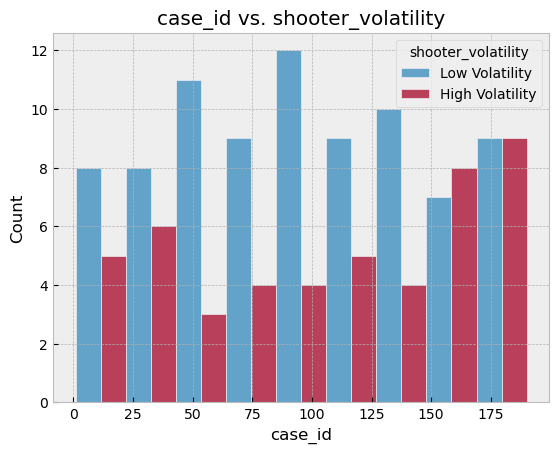

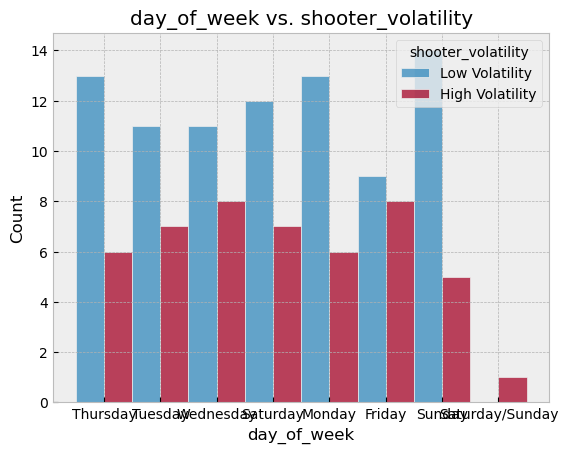

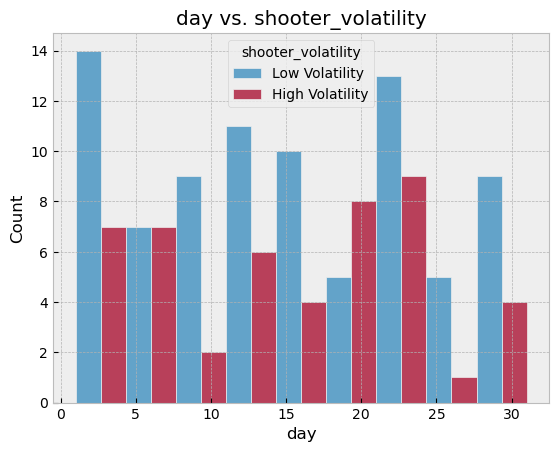

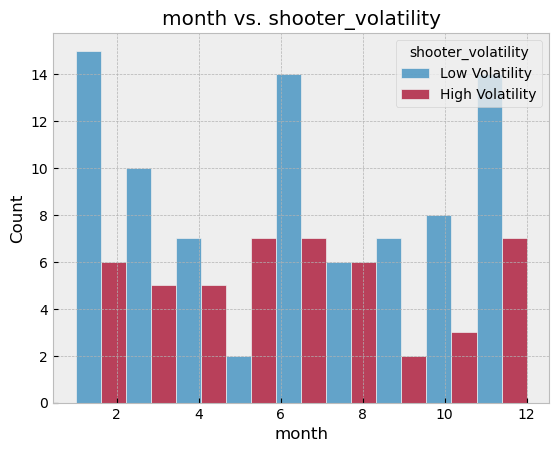

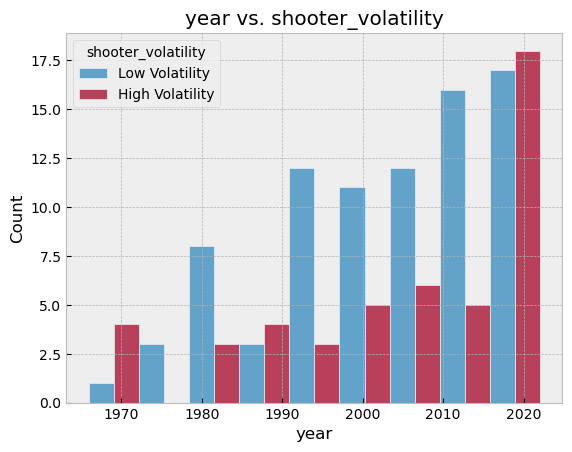

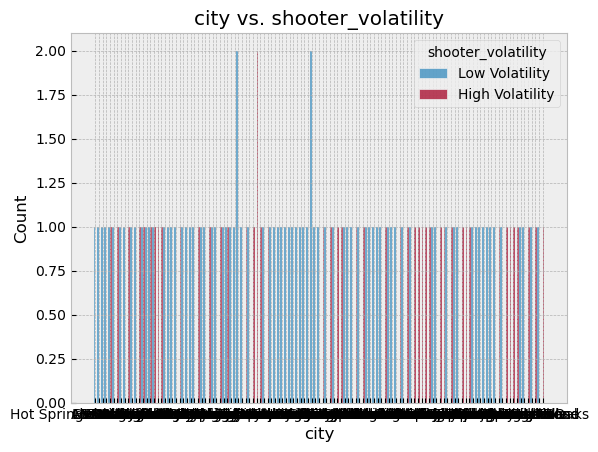

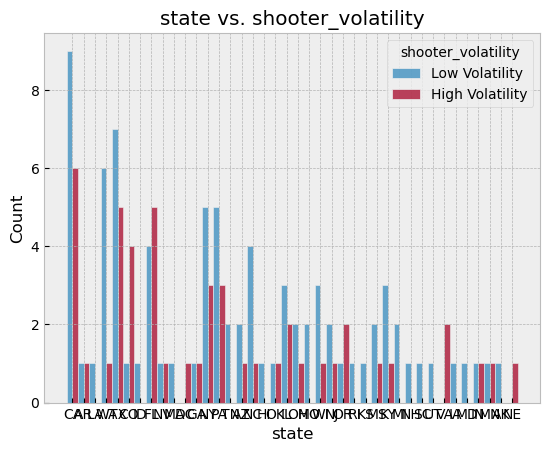

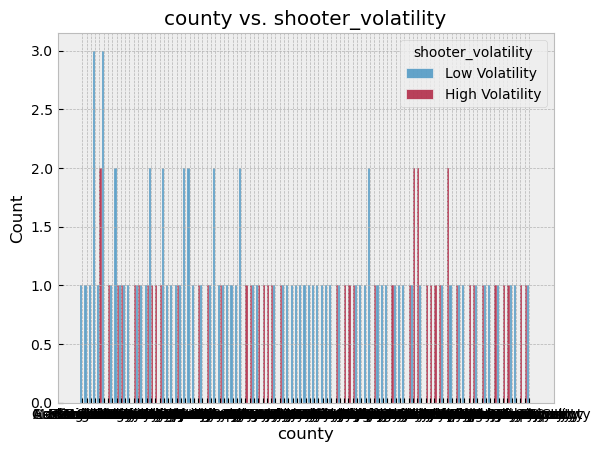

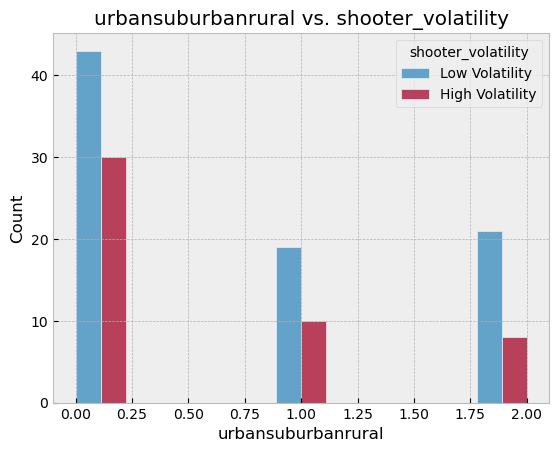

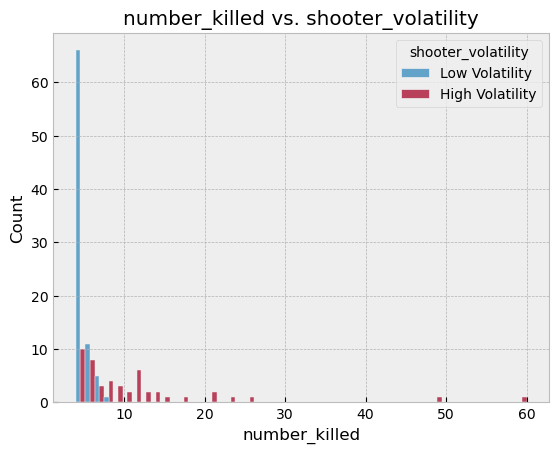

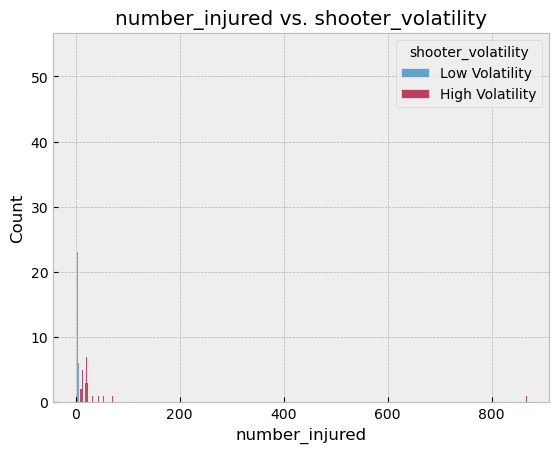

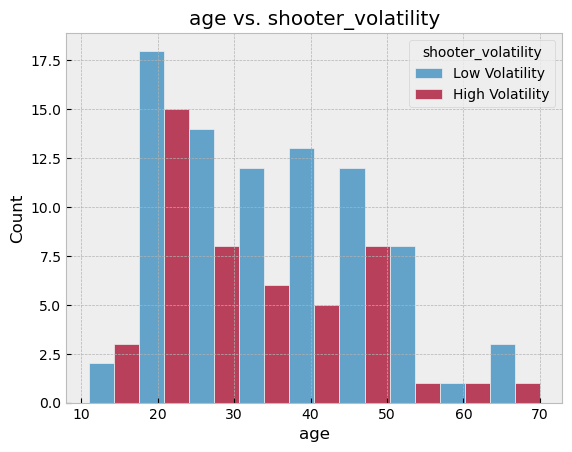

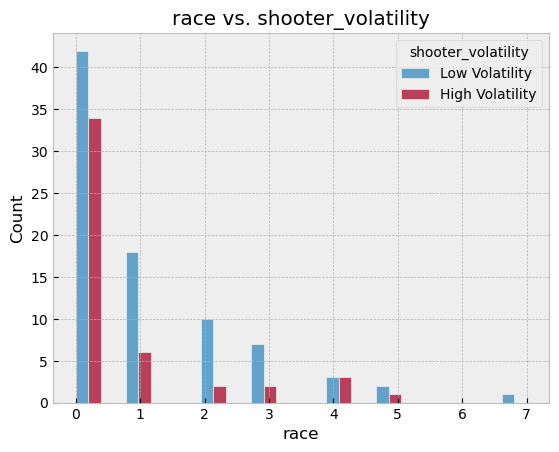

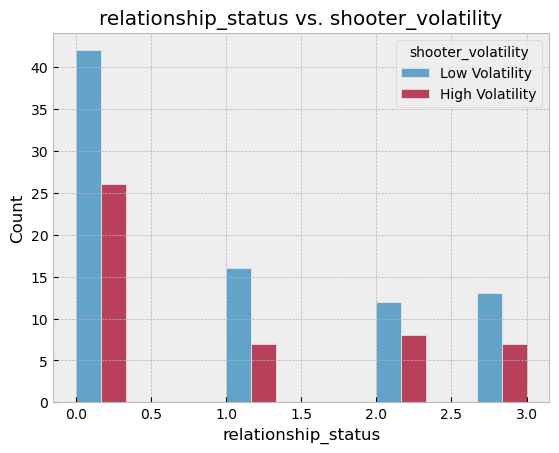

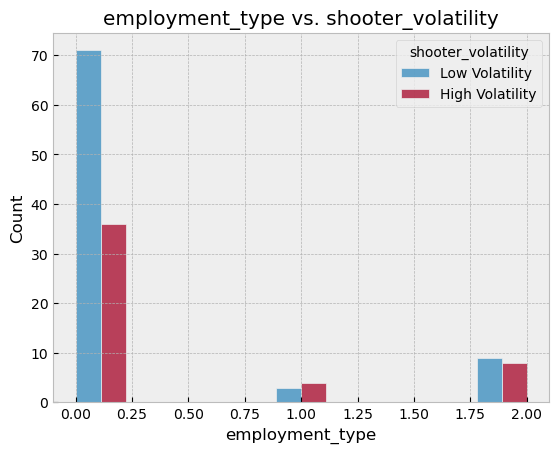

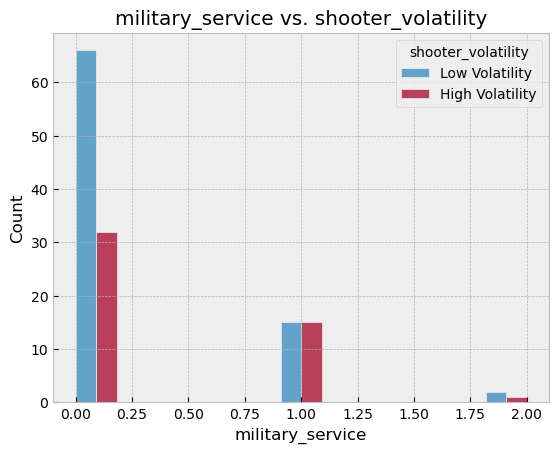

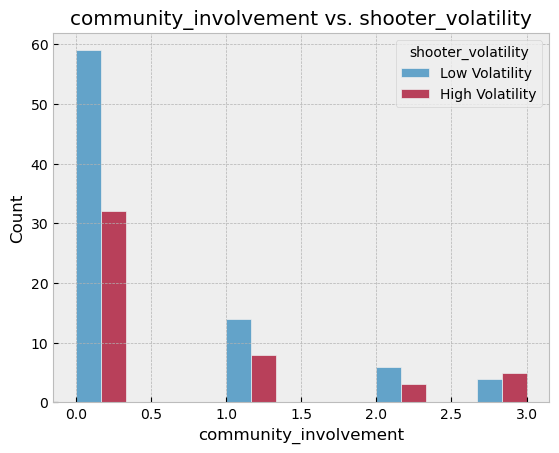

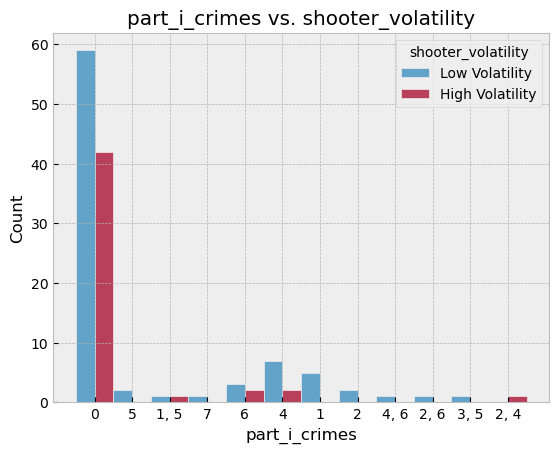

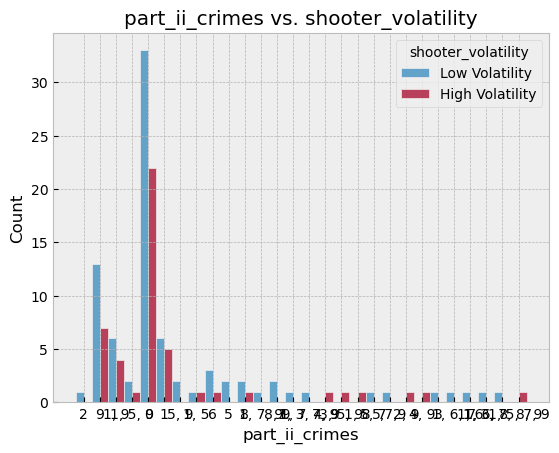

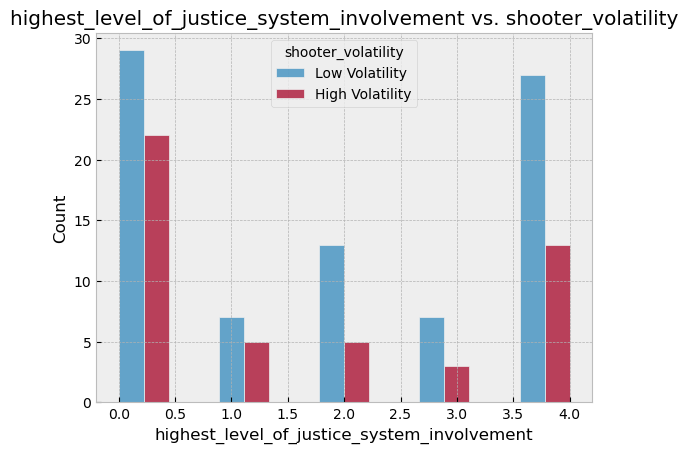

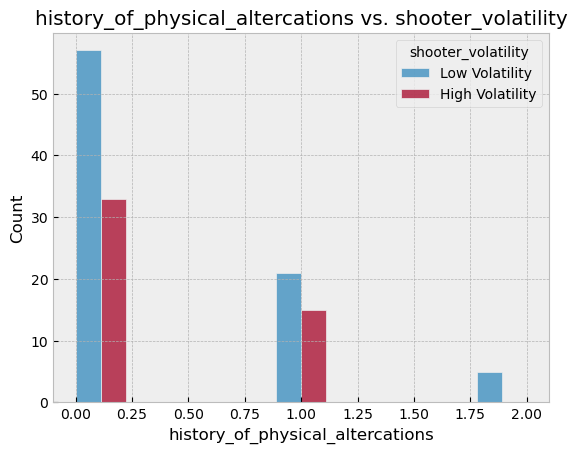

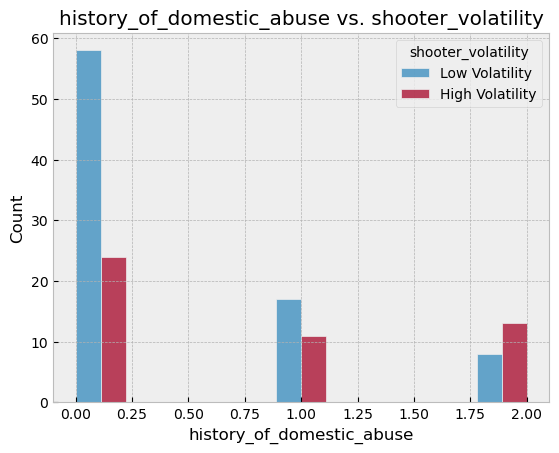

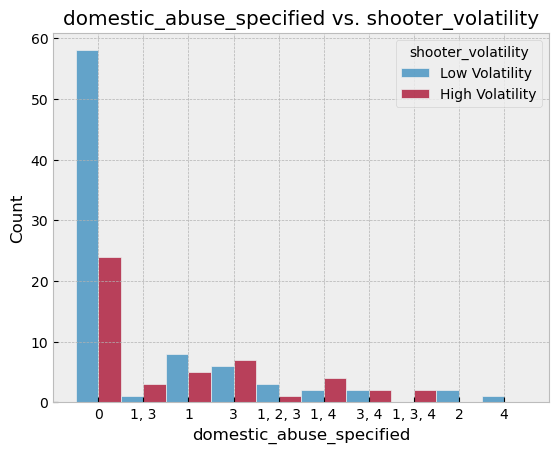

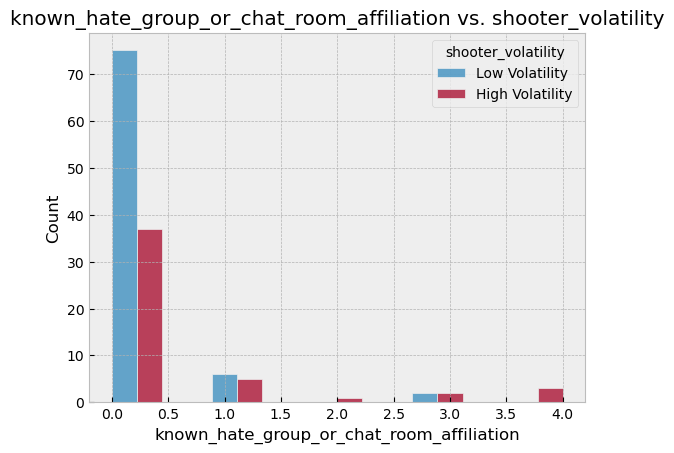

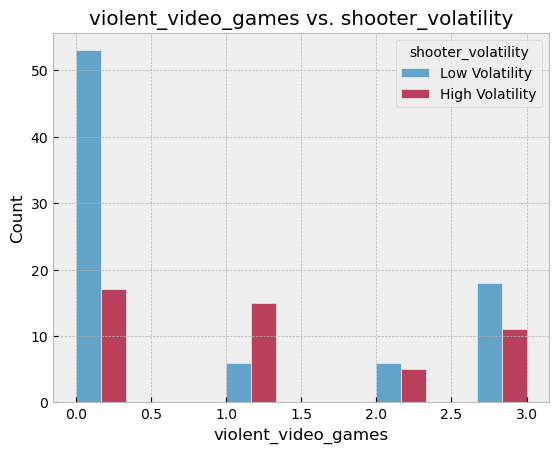

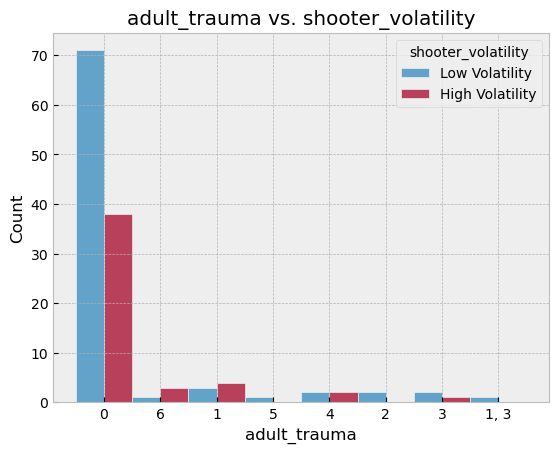

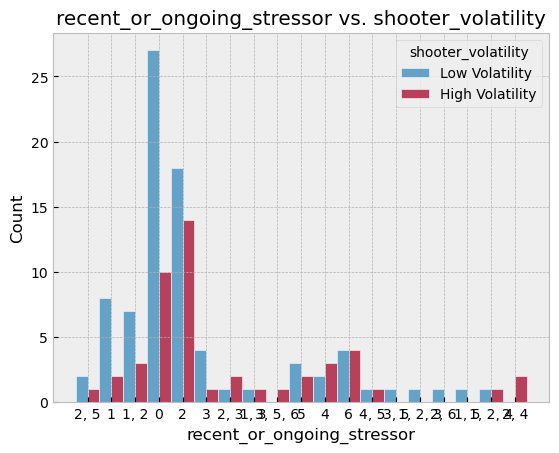

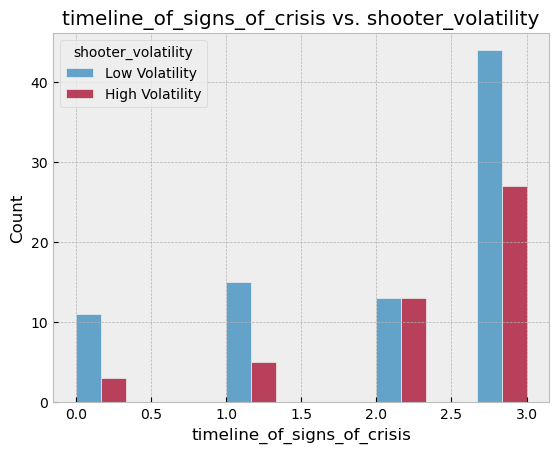

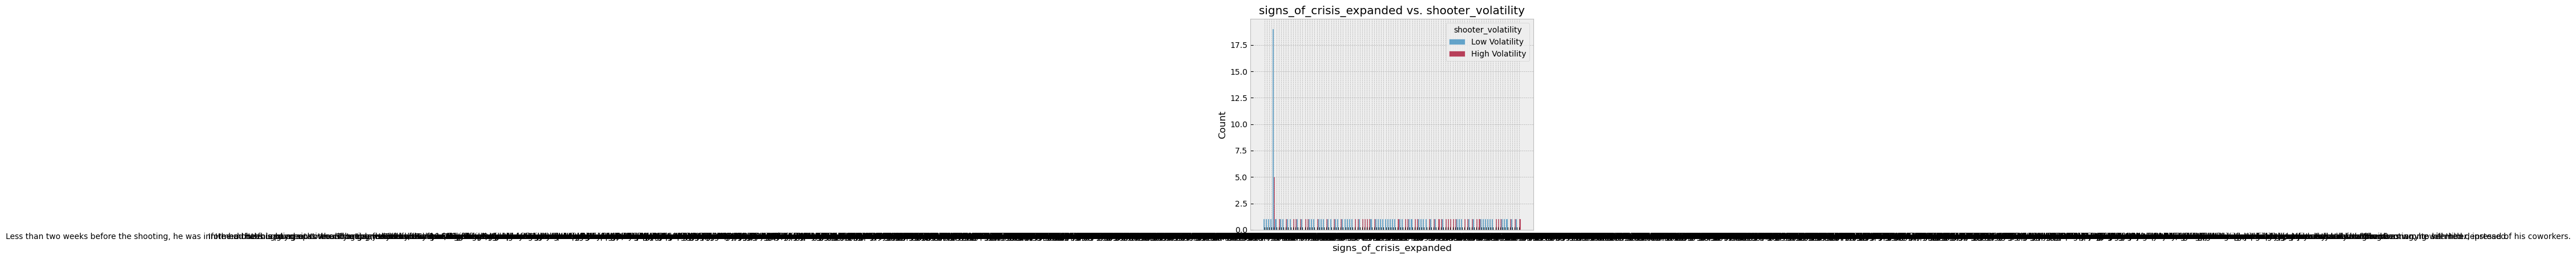

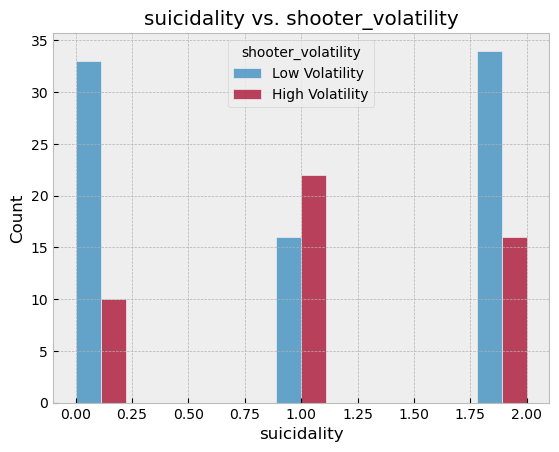

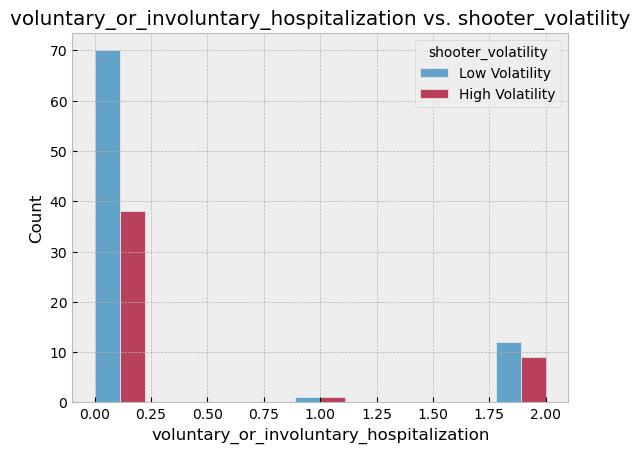

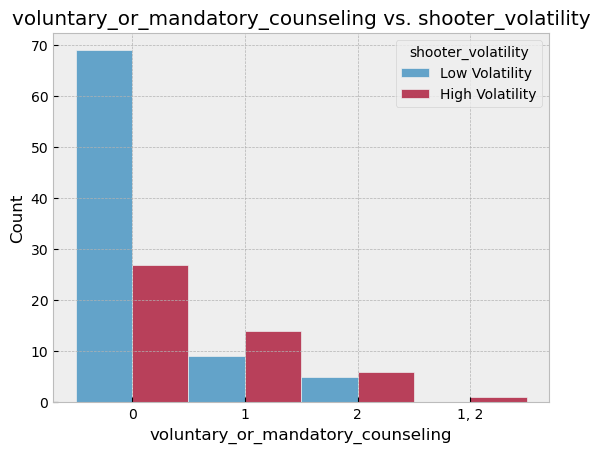

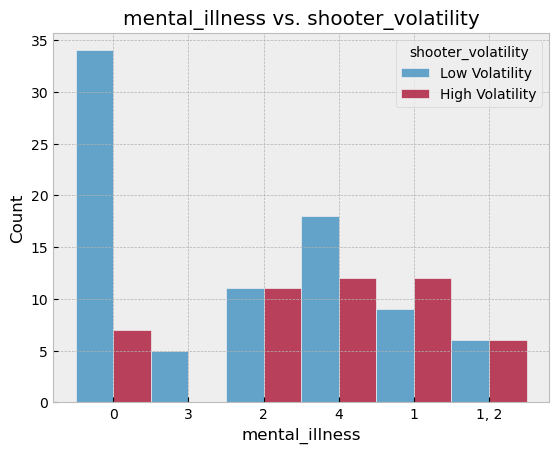

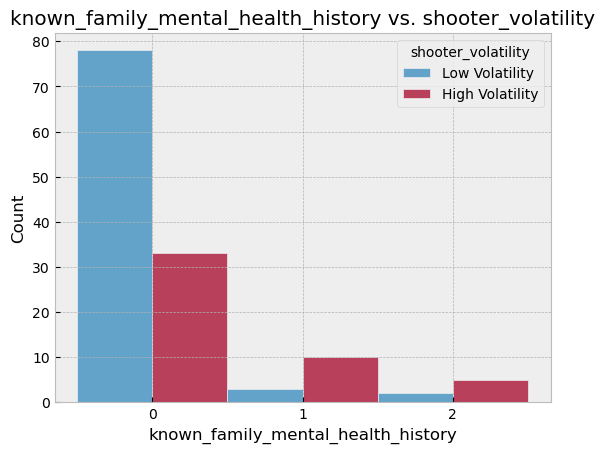

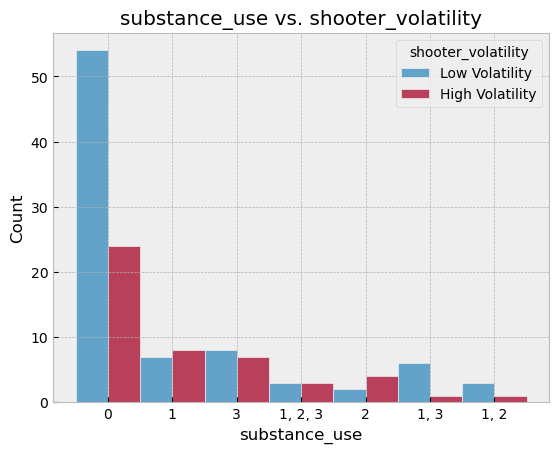

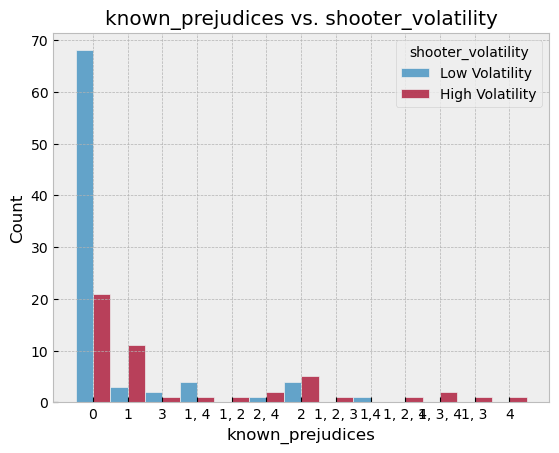

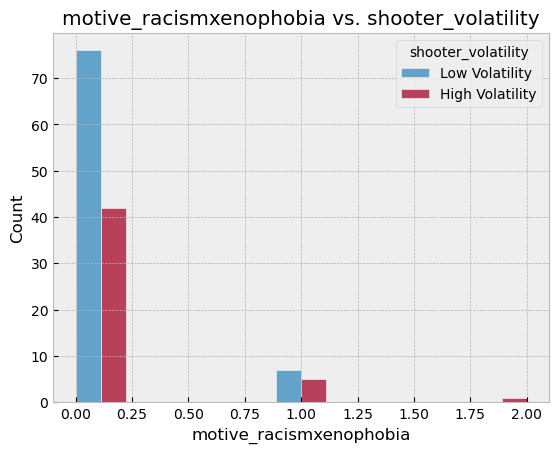

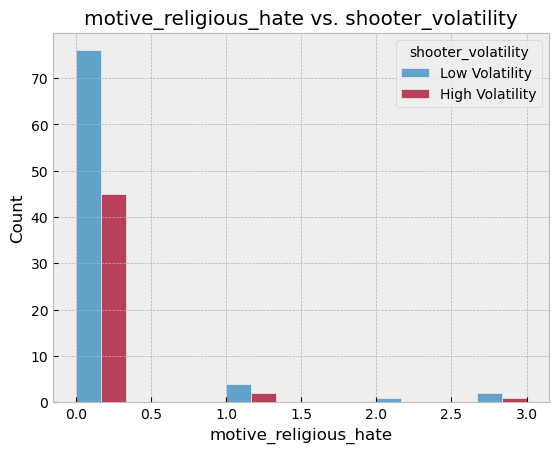

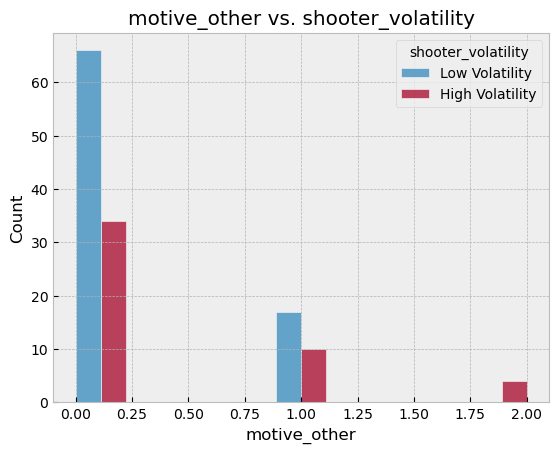

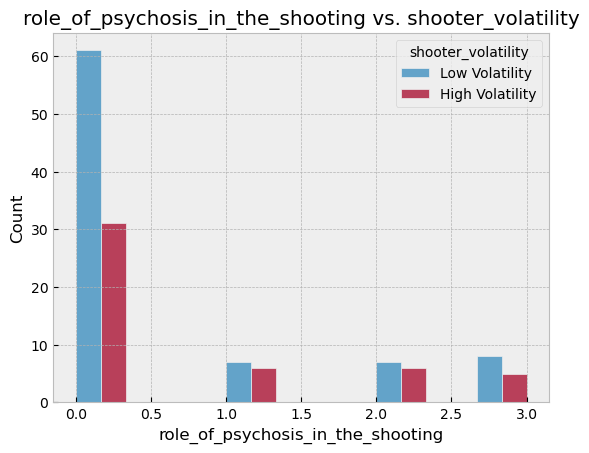

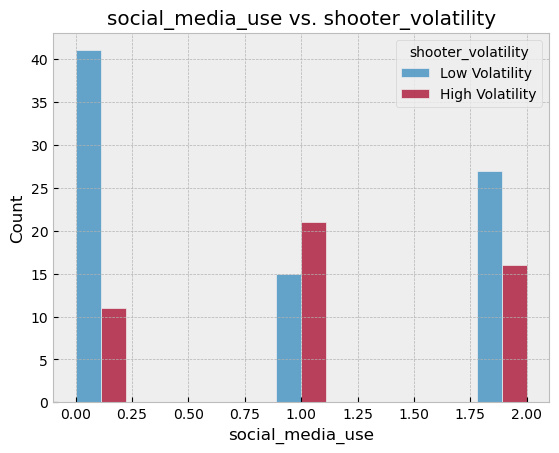

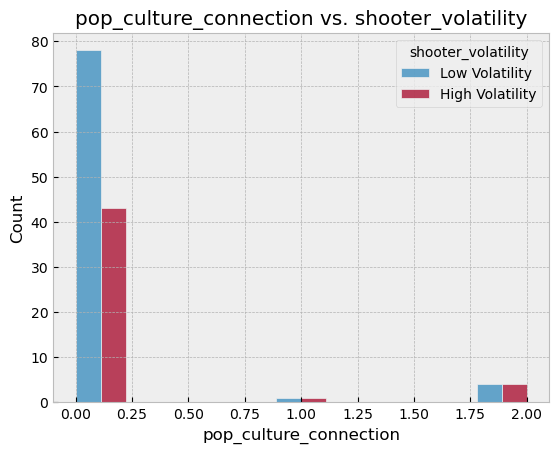

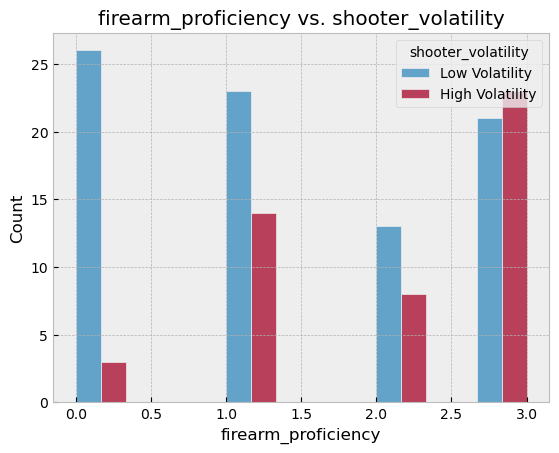

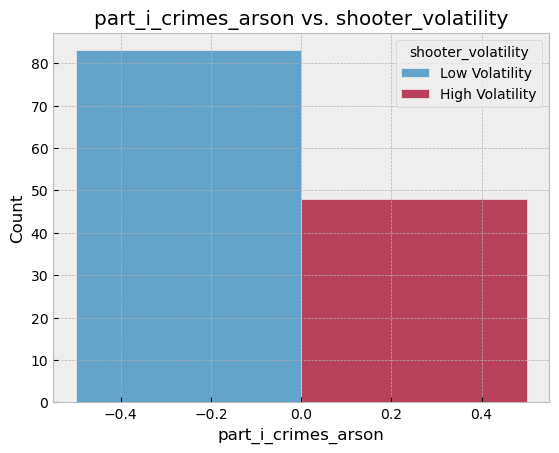

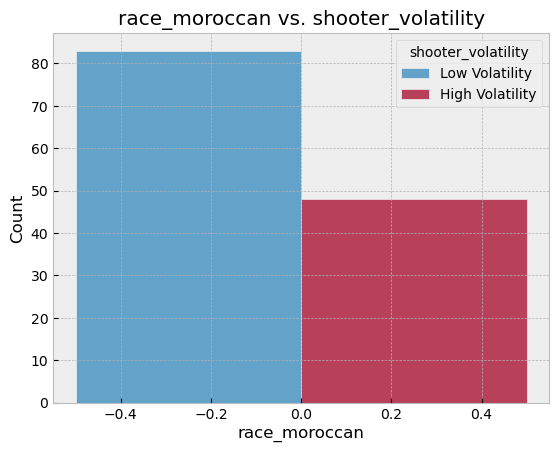

In [18]:
for col in misc_cols:
    sns.histplot(data=train, x=col, hue='shooter_volatility', multiple='dodge')
    plt.title(f'{col} vs. shooter_volatility')
    plt.show()

<h5><b><i>
Information here is merely repetitive of binary columns thus unnecessary to consider for machine learning.  It is helpful for getting a general idea of shooter_volatility distribution overall via visuals.
</i></b></h5>

<div style='background-color: orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align: center'>
        Miscellaneous
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [117]:
full = w.prepare_mass_shooters()
full.shape

(188, 254)

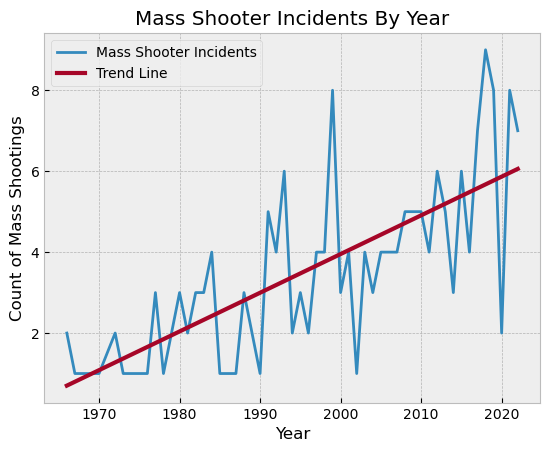

In [182]:
# Visual for 'final_report.ipynb'
full = w.prepare_mass_shooters()
year_counts = full.year.value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, label='Mass Shooter Incidents')
sns.regplot(data=year_counts, x=year_counts.index, y=year_counts.values, scatter=False, ci=0, label='Trend Line')
plt.title('Mass Shooter Incidents By Year')
plt.xlabel('Year')
plt.ylabel('Count of Mass Shootings')
plt.legend()
plt.show()

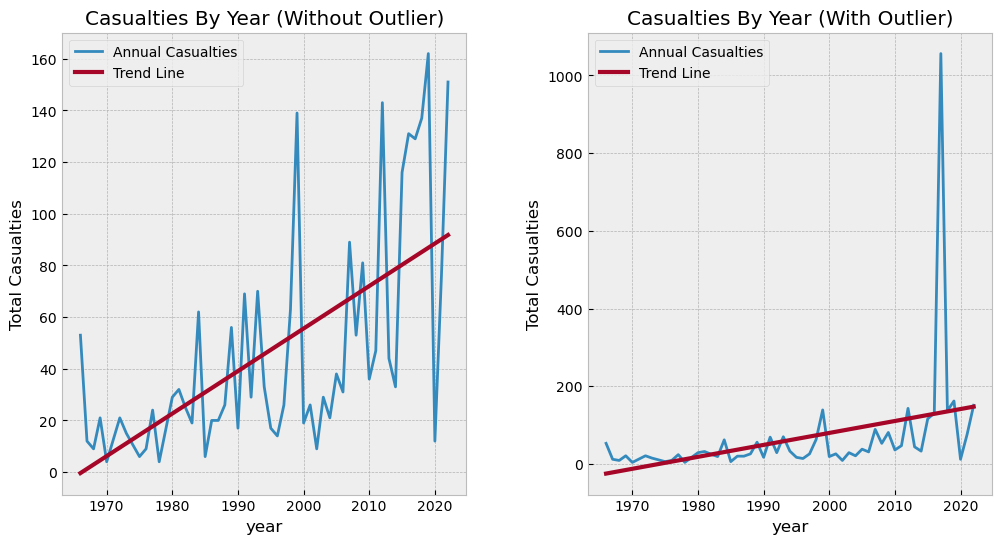

In [187]:
# Visual for 'final_report.ipynb'
full = w.prepare_mass_shooters()
removed_outlier = full[full.agg_casualties != 927]
casualties_wo_outlier = removed_outlier.groupby('year')['agg_casualties'].sum()
casualties_w_outlier = full.groupby('year')['agg_casualties'].sum()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axs[0].plot(casualties_wo_outlier.index, casualties_wo_outlier.values, label='Annual Casualties')
axs[0].set_title('Casualties By Year (Without Outlier)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Casualties')
sns.regplot(data=casualties_wo_outlier, x=casualties_wo_outlier.index, y=casualties_wo_outlier.values, scatter=False, ci=0, label='Trend Line', ax=axs[0])
axs[0].legend()
axs[1].plot(casualties_w_outlier.index, casualties_w_outlier.values, label='Annual Casualties')
axs[1].set_title('Casualties By Year (With Outlier)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total Casualties')
sns.regplot(data=casualties_w_outlier, x=casualties_w_outlier.index, y=casualties_w_outlier.values, scatter=False, ci=0, label='Trend Line', ax=axs[1])
axs[1].legend()
plt.subplots_adjust(wspace=0.3)
plt.show()

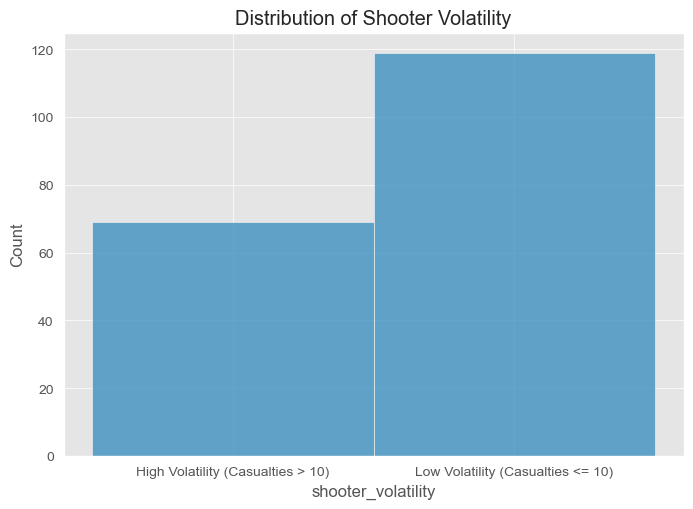

In [199]:
# Visual for 'final_report.ipynb'
sns.histplot(data=full, x='shooter_volatility')
plt.title('Distribution of Shooter Volatility')
plt.gca().set_xticklabels(['High Volatility (Casualties > 10)', 'Low Volatility (Casualties <= 10)'])
plt.show()